In [50]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory




In [51]:
data=pd.read_csv(r"D:/New folder/bank-full.csv")

In [52]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


<AxesSubplot:>

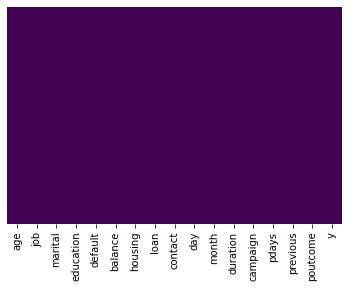

In [53]:
#Verifying null values
sns.heatmap(data.isnull(), yticklabels=False, cbar=False, cmap='viridis')


In [54]:
data.isna().any()

age          False
job          False
marital      False
education    False
default      False
balance      False
housing      False
loan         False
contact      False
day          False
month        False
duration     False
campaign     False
pdays        False
previous     False
poutcome     False
y            False
dtype: bool

In [55]:
data.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [56]:
data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [57]:
data.groupby('y').mean()

,age,balance,day,duration,campaign,pdays,previous
y,,,,,,,
no,40.838986,1303.714969,15.892290,221.182806,2.846350,36.421372,0.502154
yes,41.670070,1804.267915,15.158253,537.294574,2.141047,68.702968,1.170354


In [58]:
data['y'].value_counts()

no     39922
yes     5289
Name: y, dtype: int64

In [59]:
countNo = len(data[data.y == 'no'])
countYes = len(data[data.y == 'yes'])
print('Percentage of "No": {:.3f}%'. format((countNo/(len(data.y))*100)))
print('Percentage of "Yes": {:.3f}%'. format((countYes/(len(data.y))*100)))

Percentage of "No": 88.302%
Percentage of "Yes": 11.698%


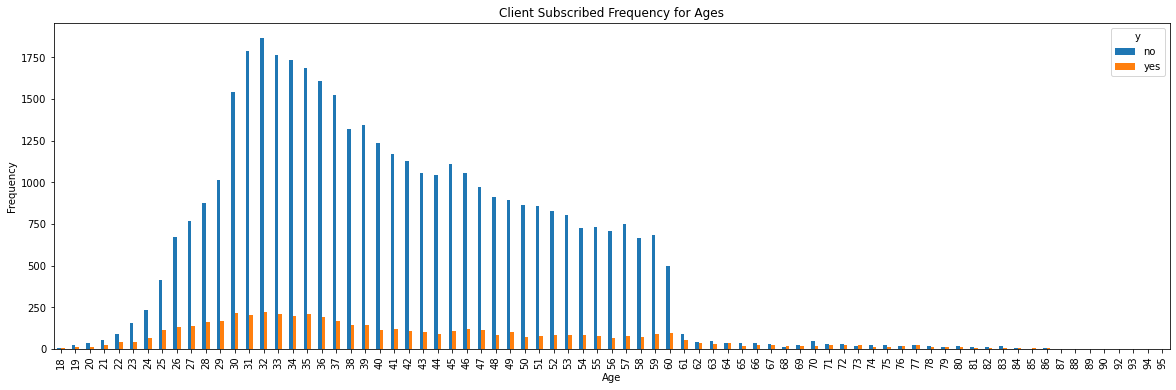

In [60]:
#Age
pd.crosstab(data.age,data.y).plot(kind="bar",figsize=(20,6))
plt.title('Client Subscribed Frequency for Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

<AxesSubplot:xlabel='age', ylabel='balance'>

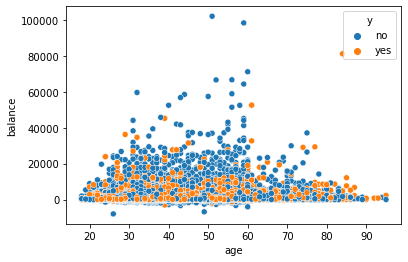

In [61]:
sns.scatterplot(x='age', y='balance',hue='y', data=data)

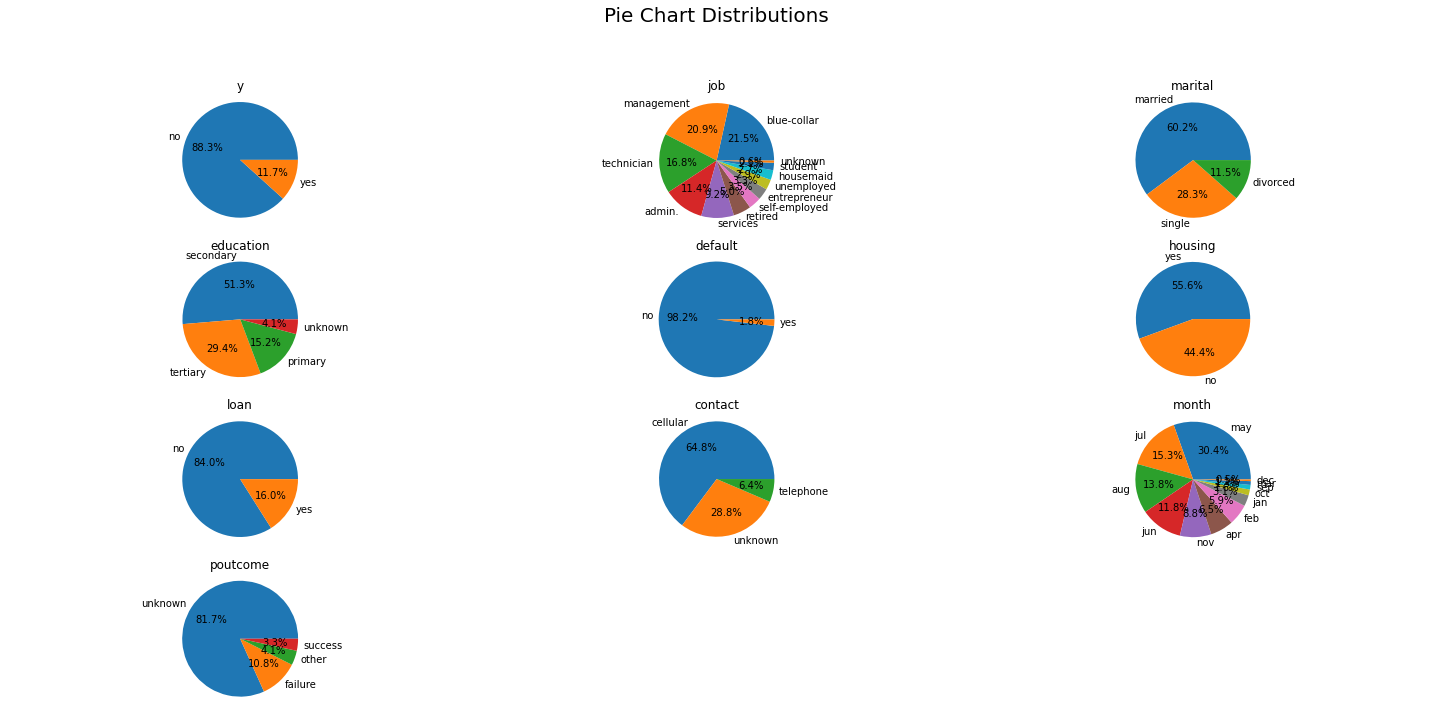

In [62]:
## Pie Plots
data.columns
data2 = data[['y','job','marital', 'education', 'default', 'housing','loan', 'contact',
             'month', 'poutcome'
                    ]]
fig = plt.figure(figsize=(20, 15))
plt.suptitle('Pie Chart Distributions', fontsize=20)
for i in range(1, data2.shape[1] + 1):
    plt.subplot(6, 3, i)
    f = plt.gca()
    f.axes.get_yaxis().set_visible(False)
    f.set_title(data2.columns.values[i - 1])
   
    values = data2.iloc[:, i - 1].value_counts(normalize = True).values
    index = data2.iloc[:, i - 1].value_counts(normalize = True).index
    plt.pie(values, labels = index, autopct='%1.1f%%')
    plt.axis('equal')
fig.tight_layout(rect=[0, 0.03, 1, 0.95])

<AxesSubplot:xlabel='y', ylabel='count'>

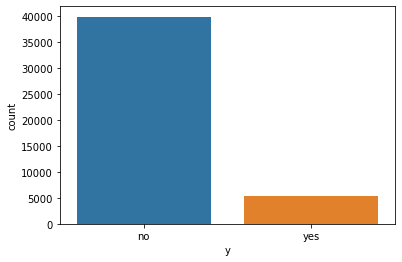

In [63]:
sns.countplot(x='y', data=data, label='Count')

In [64]:
# we delete columns whose data type is text
data1= data.drop(["job","education","contact","month","poutcome"],axis=1)

In [65]:
data1["default"] = [0 if each== "no" else 1 for each in data1.default]
data1["loan"] = [0 if each== "no" else 1 for each in data1.loan]
data1["y"] = [0 if each== "no" else 1 for each in data1.y]
data1["marital"] = [1 if each == "married" else 0 if each == "single" else 0.5 for each in data1.marital]
data1["housing"] = [1 if each == "yes" else 0  for each in data1.housing]

In [66]:
data1.head()

,age,marital,default,balance,housing,loan,day,duration,campaign,pdays,previous,y
0,58,1.0,0,2143,1,0,5,261,1,-1,0,0
1,44,0.0,0,29,1,0,5,151,1,-1,0,0
2,33,1.0,0,2,1,1,5,76,1,-1,0,0
3,47,1.0,0,1506,1,0,5,92,1,-1,0,0
4,33,0.0,0,1,0,0,5,198,1,-1,0,0


In [67]:
# Defining to y and x_data values for train data
y = data1.y.values
x_data = data1.drop(["y"],axis=1)


In [68]:
# normalization
x = (x_data - np.min(x_data)) / (np.max(x_data) - np.min(x_data))


In [69]:
# train test split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test =  train_test_split(x,y,test_size=0.15,random_state=42)# we define 2 list that one of them save results of models other list save name of model



In [70]:
labelList = []
resultList = []

In [71]:
# Logictic Regression with sklearn
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train,y_train)
print("test accuracy {}".format(lr.score(x_test,y_test)))

# adding result and label to lists
labelList.append("Log_Rec")
resultList.append(lr.score(x_test,y_test))

test accuracy 0.8879386611618991


In [72]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)

print("decison tree score : ",dt.score(x_test,y_test))

# adding result and label to lists
labelList.append("Dec_Tree")
resultList.append(dt.score(x_test,y_test))

decison tree score :  0.8506340312592156


In [73]:
# Random forest
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100,random_state = 1)
rf.fit(x_train, y_train)
print("Random forest algor. result: ",rf.score(x_test,y_test))

# adding result and label to lists
labelList.append("Rand_For")
resultList.append(rf.score(x_test,y_test))

Random forest algor. result:  0.893394278973754


In [74]:
# Naive Byes 
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(x_train,y_train)
print("print accuracy of naive bayes algo: ",nb.score(x_test,y_test))

# adding result and label to lists
labelList.append("Naive_Byes")
resultList.append(nb.score(x_test,y_test))

print accuracy of naive bayes algo:  0.8571217929814214


In [75]:
# KNN model
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3) #n_neighbors = k
knn.fit(x_train,y_train)
prediction = knn.predict(x_test)

# score
print(" {} nn score: {} ".format(3,knn.score(x_test,y_test)))

 3 nn score: 0.8752580359775878 


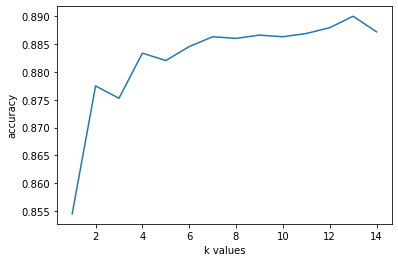

In [76]:
# Finding optimum k value between 1 and 15
score_list = []
for each in range(1,15):
    knn2 = KNeighborsClassifier(n_neighbors = each) # create a new knn model
    knn2.fit(x_train,y_train)
    score_list.append(knn2.score(x_test,y_test))

plt.plot(range(1,15),score_list) # x axis is in interval of 1 and 15
plt.xlabel("k values")
plt.ylabel("accuracy")
plt.show()

In [77]:
# finding max value in a list and it's index.
a = max(score_list) # finding max value in list
b = score_list.index(a)+1 # index of max value.

print("k = ",b," and maximum value is ", a)

# adding result and label to lists
labelList.append("KNN")
resultList.append(a)

k =  13  and maximum value is  0.890002948982601


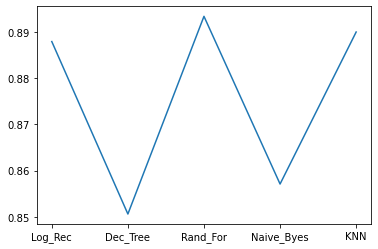

In [78]:
plt.plot(labelList,resultList)
plt.show()

In [79]:
# Above chart give information to us about results of classification algorithms but it is not sorted and clear chart.
# We can improve this graph to read it easily.

In [80]:
# First of all we combine 2 lists (labelList and resultList) by using zip method
zipped = zip(labelList, resultList)
zipped = list(zipped)



In [81]:
df = pd.DataFrame(zipped, columns=['label','result'])

In [82]:
df

,label,result
0,Log_Rec,0.887939
1,Dec_Tree,0.850634
2,Rand_For,0.893394
3,Naive_Byes,0.857122
4,KNN,0.890003


In [83]:
new_index = (df['result'].sort_values(ascending=False)).index.values 
sorted_data = df.reindex(new_index)


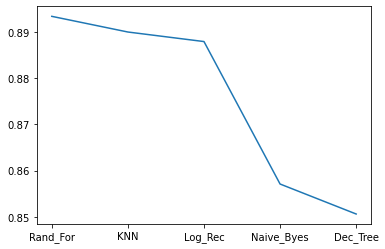

In [84]:
plt.plot(sorted_data.loc[:,"label"],sorted_data.loc[:,"result"])
plt.show()









In [85]:
sorted_data

,label,result
2,Rand_For,0.893394
4,KNN,0.890003
0,Log_Rec,0.887939
3,Naive_Byes,0.857122
1,Dec_Tree,0.850634
